In [1]:
import numpy as np
from sympy import *
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display, Math
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.size'] = 24
plt.rcParams['legend.fontsize'] = 14

## Heat Equation

# $\qquad\qquad\displaystyle\frac{\partial u(x,t)}{\partial t}=\alpha\nabla u(x,t)$

 Let $\alpha > 0$ be a material parameter.                                                                                   
                                                                
$\qquad\qquad\displaystyle\partial_tu − \alpha\partial_{xx}u = 0$ in $\Omega\times\text{I} $ PDE,                                                                                                  
$\qquad\qquad\displaystyle u(t, 0) = u(t, 1)$ on $\partial{ }\Omega$ Boundary condition,                                                                                   
$\qquad\qquad\displaystyle u(0, x) = u0(x)$ in $\partial\times\{0\}$ Initial condition.                                                                                      
The PDE is complemented with a boundary condition of Dirichlet type, here a 1-periodic boundary condition, and an intial condition for time $t = 0.$

For spatial and temporal discretization, we introduce a spatial mesh parameter $h$ and a temporal mesh parameter $k:$           
$\qquad\qquad\displaystyle h = \frac{1}{(N + 1)} > 0,\quad k > 0.   $                                                                                                  
We define the (mesh) nodes                                                                                                     
$\qquad\qquad\displaystyle (tn, xj ) = (nk, jh) \qquad\forall n ≥ 0, \ j \in {0, 1, . . . , N + 1}.$                                              
A discrete value that approximates the (unknown) exact solution in a point $(tn, xj)$ is denoted by $u^n_j.$             
The initial value is discretized by                                                                                                    
$\qquad\qquad\displaystyle u^0_j = u_0(x_j ),\qquad j \in {0, 1, . . . , N + 1}.$                                                          
As boundary values we have in the discrete sense                                                                                
$\qquad\qquad\displaystyle u^n_0 = u^n_{N+1}\qquad \forall n > 0.$                                                                          
To this end, at each time point, we compute the values                                                                        
$\qquad\qquad\displaystyle (u^n_j)_{1\leq j\leq N} \in \mathbb{R}^N$                                                                                  
In the following we introduce some schemes (i.e., algorithms) in order to compute these solution values.                        
Each scheme yields a system of $N$ equations $\big($for each spatial point $x_j$ for $1 \leq j \leq N\big)$ in order to compute the $N$ components of $u^n_j.$

In [2]:
def heat_eqn(x,t,boundaryConditions,initialConditions):
    T=np.zeros((len(x),len(t)))
    T[0,:]=boundaryConditions[0]
    T[-1,:]=boundaryConditions[1]
    T[:,0]=initialConditions    
    #display(Math(r'T = '+latex(Matrix(T.round(3)))))
    return T

## Explicit Method

An explicit scheme (explicit in terms of n) is   
Now from L.H.S. ,                                                                                                           
$\qquad\qquad\displaystyle \frac{\partial u(x,t)}{\partial t}=\frac{u^{n+1}_j-u^n_j}{k}$  
Re-writing in matrix form :                                                                                                 
$\qquad\qquad\displaystyle \frac{\partial u(x,t)}{\partial t}=\frac{u_{i,j}-u_{i,j-1}}{k}$  
from R.H.S. ,                                                                                                           
$\qquad\qquad\displaystyle \frac{\partial^2 u(x,t)}{\partial x^2}=\alpha\frac{u^n_{j−1} - 2u^n_j + u^n_{j+1}}{h^2}$  
Re-writing in matrix form :                                                                                                 
$\qquad\qquad\displaystyle \frac{\partial^2 u(x,t)}{\partial x^2}=\alpha\frac{u_{i-1,j-1}-2u_{i,j-1}+u_{i+1,j-1}}{h^2}$  
Now on comparing R.H.S and L.H.S. , we get :-                                                                     
$\qquad\qquad\displaystyle \frac{u^{n+1}_{j} − u^n_j}{k} + \alpha\frac{−u^n_{j−1} + 2u^n_j − u^n_{j+1}}{h^2}= 0$                   
for $n > 0$ and $j\in{1, . . . , N}.$         

Re-writing in matrix form :                                                                                                  
$\qquad{ }\qquad\displaystyle \frac{u_{i,j}-u_{i-1,j}}{k}=\alpha\frac{u_{i-1,j-1}-2u_{i,j-1}+u_{i+1,j-1}}{h^2}$  

$\qquad =>\qquad\displaystyle  u_{i,j}-u_{i-1,j}=\frac{k\alpha}{h^2}[u_{i-1,j-1}-2u_{i,j-1}+u_{i+1,j-1}]$  

$\qquad =>\qquad\displaystyle  u_{i,j}=u_{i,j-1}+\frac{k\alpha}{h^2}[u_{i-1,j-1}-2u_{i,j-1}+u_{i+1,j-1}]$  

Let $\displaystyle\lambda=\frac{k\alpha}{h^2}$                                               

So that,                                                                                                                     
$\qquad {}\qquad\displaystyle  u_{i,j}= \lambda u_{i-1,j-1}+(1-2\lambda)u_{i,j-1}+\lambda u_{i+1,j-1}$ 


In matrix form we are interchanging                                                                                           
$\qquad{ }\qquad\displaystyle  j \rightarrow i $ and $n+1 \rightarrow j => n\rightarrow j-1 $                                                                
This scheme is known from ordinary differential equations as the forward Euler scheme .                                       

In [3]:
def explicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions):
    T=heat_eqn(x,t,boundaryConditions,initialConditions)
    lam = k/h**2
    for j in range(1,len(t)):
        for i in range(1,len(x)-1):
            T[i,j]=lam*T[i-1,j-1] + (1-2*lam)*T[i,j-1] + lam*T[i+1, j-1]
    #display(Math(r'T_{explicit} = '+latex(Matrix(T.round(3)))))
    return T

## Implicit Method

An implicit scheme (implicit in terms of $n$, i.e., the solution is not immediately obtained) is                              
$\qquad\qquad\displaystyle \frac{u^{n+1}_j − u^n_j}{k}+ \alpha\frac{−u^{n+1}_{j−1} + 2u^{n+1}_j − u^{n+1}_{j+1}}{h^2}= 0$         
for $n > 0$ and $j\in{1, . . . , N}.$                                                                                        
This scheme is the well-known backward Euler scheme.
It must be further justified that indeed the implicit scheme can be used the values $u^{n+1}_j.$                           
To this end, we have to write out explicitly all N equations, yielding a linear equation system.                             
Now, we need to check whether the resulting matrix is invertible.                                                            
Let $\lambda = \frac{k\alpha}{h^2}$                                                                                                       
 Tridiagonal Matrix : Thomas Algorithm                                                                                                        
 $\qquad \begin{pmatrix} 
   1+2\lambda & -\lambda & 0 & \dots & \dots & 0 \\
     -\lambda & 1+2\lambda & -\lambda & \ddots& \ddots & \vdots \\
      \vdots& \ddots&  \ddots& \ddots& \ddots& 0 \\
      \vdots& \ddots&  \ddots& -\lambda& 1+2\lambda & -\lambda\\
      0& \dots& \dots&  0& -\lambda& 1+2\lambda
  \end{pmatrix}
  \begin{Bmatrix}
   u_{1,j+1} \\
   u_{2,j+1} \\
   \vdots \\
   \vdots \\
   u_{n-1,j+1} \end{Bmatrix} =
  \begin{pmatrix} 
   u_{1,j}+\lambda u_{0,j+1} \\
   u_{2,j} \\
   \vdots \\
   \vdots \\
   u_{n-1,j}+\lambda u_{n,j+1}
  \end{pmatrix}$

In [4]:
def implicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions):
    lam = k/h**2
    n,m=len(x),len(t)
    T=heat_eqn(x,t,boundaryConditions,initialConditions)
    A=np.diag([1+2*lam]*(n-2),0) + np.diag([-lam]*(n-3),-1) + np.diag([-lam]*(n-3),1)
    #display(Math(r'A = '+latex(Matrix(A))))
    
    for j in range(1,m):
        b=T[1:-1,j-1].copy()
        b[0]=b[0]+lam*T[0,j]
        b[-1]=b[-1]+lam*T[-1,j]
        solution=np.linalg.solve(A,b)
        T[1:-1,j]=solution
    #display(Math(r'b = '+latex(Matrix(np.round(b,3)))))
    #display(Math(r'T_{implicit} = '+latex(Matrix(np.round(T,3)))))
    return T

## Crank Nicholson Method

The $\theta$ scheme is defined as:

$\qquad\qquad\displaystyle \frac{u^{n+1}_j − u^n_j}{k}+\alpha\theta\frac{−u^{n+1}_{j−1}+2u^{n+1}_j−u^{n+1}_{j+1}}{h^2}+\alpha\Big(1 +\theta\Big)\frac{−u^n_{j−1} + 2u^n_j − u^n_{j+1}}{h^2}= 0$                                                                       
for $n > 0$ and $j\in{1, . . . , N}.$                                                                                        
So from the above equation we calculate the Average between two time leves :                                                   
$\qquad\qquad\displaystyle{ \frac{u_{i,j+1}-u_{i,j}}{k}= \frac{\alpha}{2h^2}(u_{i-1,j}-2u_{i,j}+u_{i+1,j})+\frac{\alpha}{2h^2}(u_{i-1,j+1}-2u_{i,j+1}+u_{i+1,j+1})}$                            
Let $\displaystyle\lambda = \frac{k\alpha}{h^2}$                                                                                                       
So on introducing Tridiagonal Matrix Metod                                                                                     
$\qquad\qquad\displaystyle{-\frac{\lambda}{2}u_{i-1,j+1}+(1+\lambda)u_{i,j+1}-\frac{\lambda}{2}u_{i+1,j+1}=\frac{\lambda}{2}u_{i-1,j}+(1-\lambda)u_{i,j}+\frac{\lambda}{2}u_{i+1,j}}$

$\qquad=>\qquad\displaystyle{\lambda u_{i-1,j+1}+2(1+\lambda)u_{i,j+1}-\lambda u_{i+1,j+1}=\lambda u_{i-1,j}+2(1-\lambda)u_{i,j}+\lambda u_{i+1,j}}$

 $\qquad \begin{pmatrix} 
   2+2\lambda & -\lambda & 0 & \dots & \dots & 0 \\
     -\lambda & 2+2\lambda & -\lambda & \ddots& \ddots & \vdots \\
      \vdots& \ddots&  \ddots& \ddots& \ddots& 0 \\
      \vdots& \ddots&  \ddots& -\lambda& 2+2\lambda & -\lambda\\
      0& \dots& \dots&  0& -\lambda& 2+2\lambda
  \end{pmatrix}
  \begin{Bmatrix}
   u_{1,j+1} \\
   u_{2,j+1} \\
   \vdots \\
   \vdots \\
   u_{n-1,j+1} \end{Bmatrix} =
  \begin{pmatrix} 
   2-2\lambda & \lambda & 0 & \dots & \dots & 0 \\
     \lambda & 2-2\lambda & \lambda & \ddots& \ddots & \vdots \\
      \vdots& \ddots&  \ddots& \ddots& \ddots& 0 \\
      \vdots& \ddots&  \ddots& \lambda& 2-2\lambda & \lambda\\
      0& \dots& \dots&  0& \lambda& 2-2\lambda
  \end{pmatrix}$
  
Here the classification (whether implicit or explicit) depends on the choice of $\theta\in[0, 1].$                           

In [5]:
def Crank_Nicholson_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions):
    lam = k/h**2
    n,m=len(x),len(t)
    
    T=heat_eqn(x,t,boundaryConditions,initialConditions)
    #display(Math(r'$ A \cdot b = B$'))
    
    A=np.diag([2+2*lam]*(n-2),0) + np.diag([-lam]*(n-3),-1) + np.diag([-lam]*(n-3),1)
    #display(Math(r'A = '+latex(Matrix(A))))
    
    B=np.diag([2-2*lam]*(n-2),0) + np.diag([lam]*(n-3),-1) + np.diag([lam]*(n-3),1)
    #display(Math(r'B = '+latex(Matrix(B))))
    
    for j in range(0,m-1):
        b=T[1:-1,j].copy()
        b=np.dot(B,b)
        b[0]=b[0]+lam*(T[0,j]+T[0,j+1])
        b[-1]=b[-1]+lam*(T[-1,j]+T[-1,j+1])
        solution=np.linalg.solve(A,b)
        T[1:-1,j+1]=solution
    #display(Math(r'b = '+latex(Matrix(np.round(b,3)))))
    #display(Math(r''+latex(Matrix(A))+r''+latex(Matrix(np.round(b,3)))+r'='+latex(Matrix(X))))
    #display(Math(r'T_{Crank Nicholson} = '+latex(Matrix(np.round(T,3)))))
    return T

<IPython.core.display.Math object>

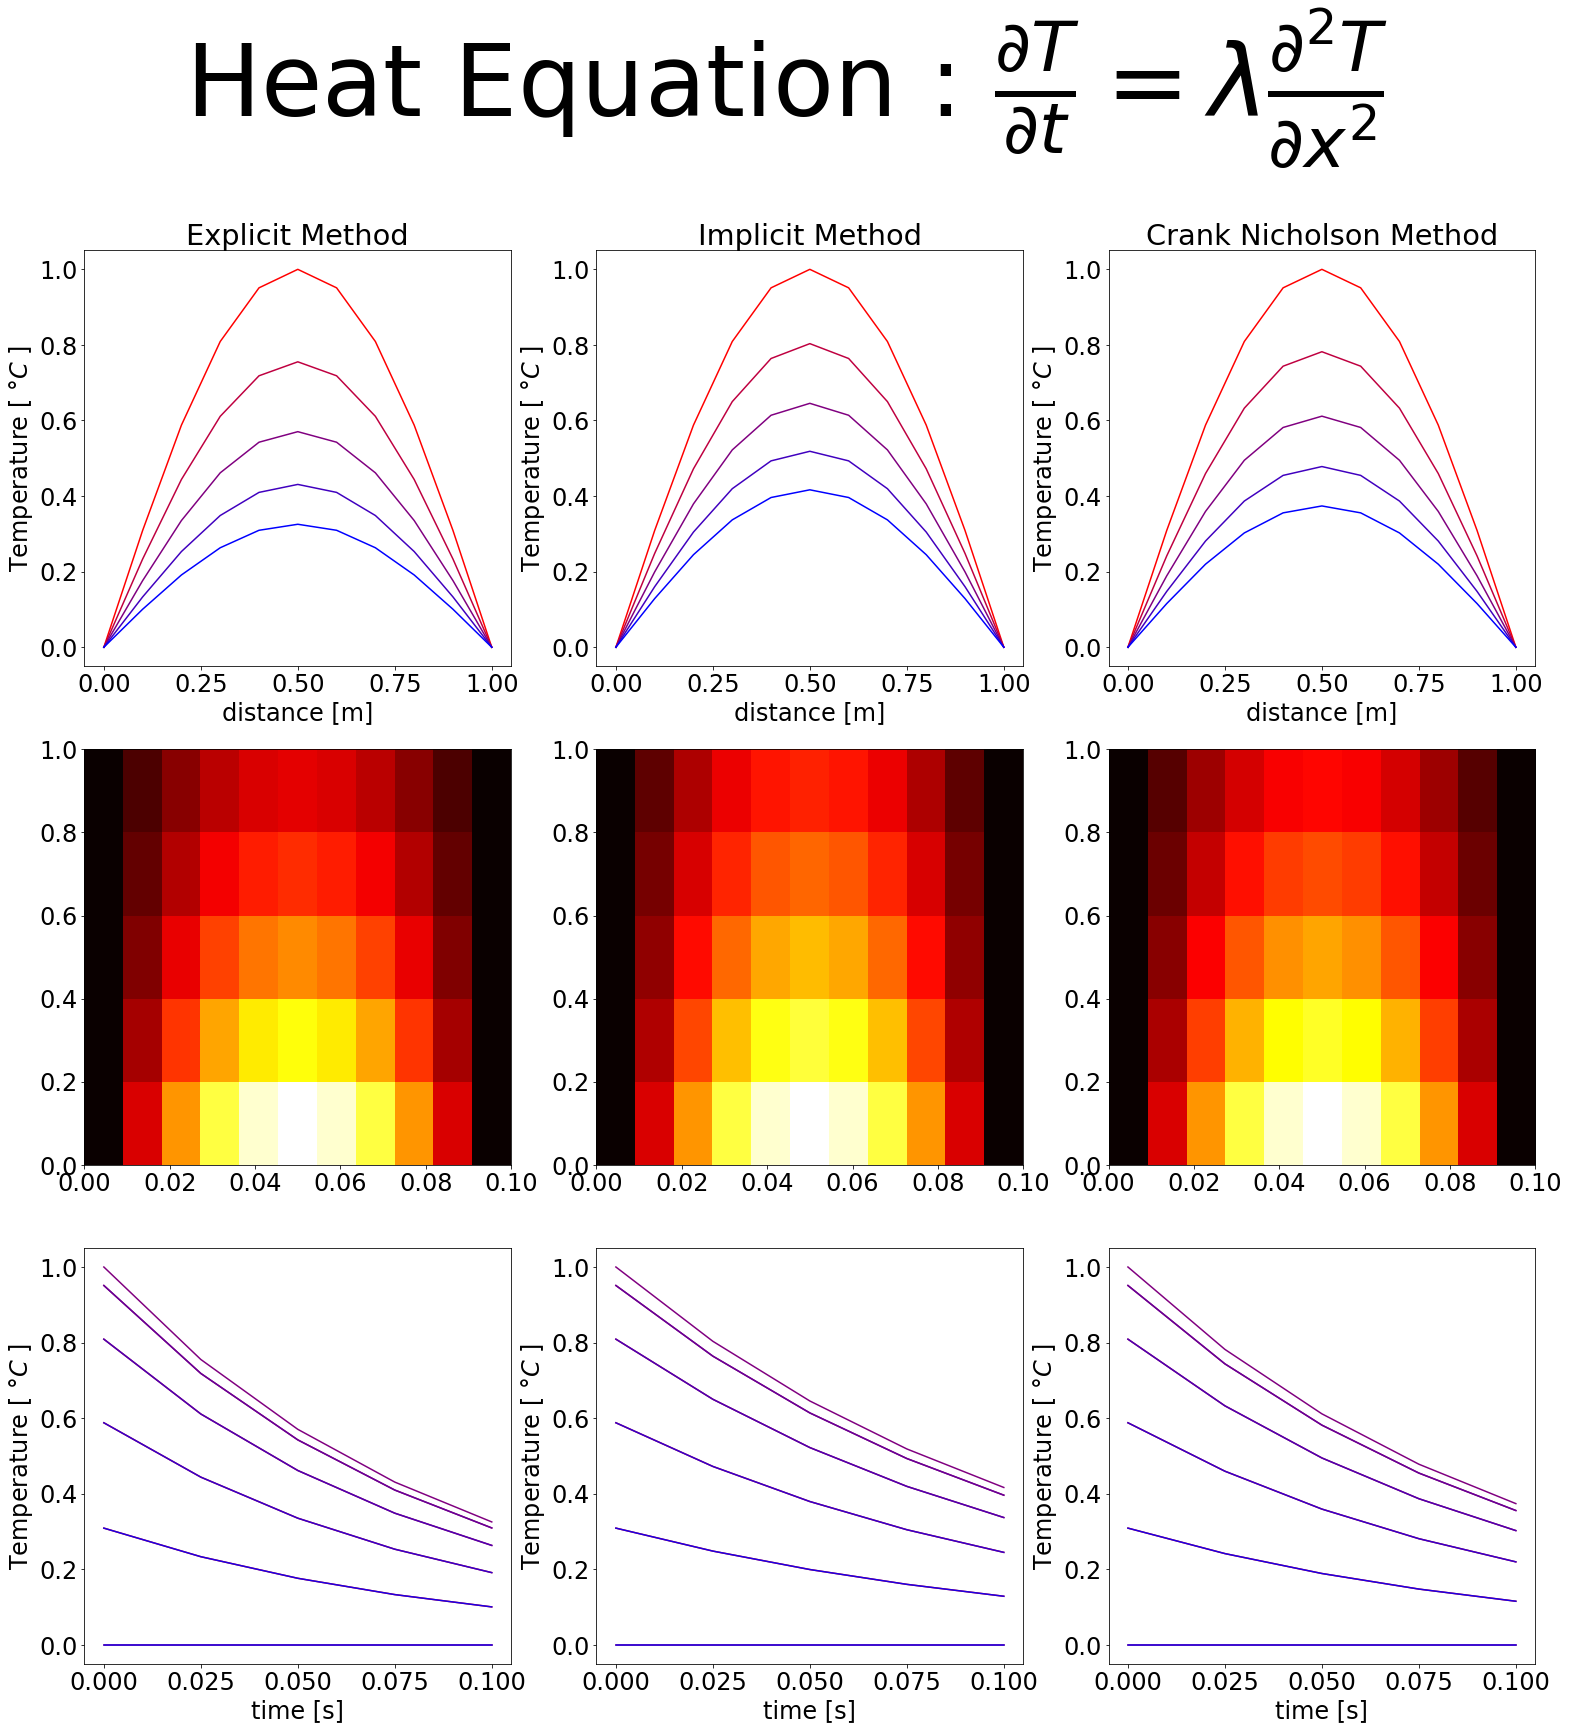

In [6]:
N=100
#h=1/(N+1)
h=0.1
k=0.025
x=np.arange(0,1+h,h)
t=np.arange(0,0.1+k,k)
boundaryConditions=[0,0]
initialConditions= np.sin(np.pi*x)

EH=explicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

IH=implicit_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

CN=Crank_Nicholson_heat(heat_eqn,h,k,x,t,boundaryConditions,initialConditions)

display(Math(r'T_{explicit} = '+latex(Matrix(EH.round(3))) + \
             r'T_{implicit} = '+latex(Matrix(IH.round(3))) + \
             r'T_{Crank Nicholson} = '+latex(Matrix(CN.round(3)))))
fig=plt.figure(figsize=(26,26))
gs=fig.add_gridspec(3,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])
ax4=fig.add_subplot(gs[1,0])
ax5=fig.add_subplot(gs[1,1])
ax6=fig.add_subplot(gs[1,2])
ax7=fig.add_subplot(gs[2,0])
ax8=fig.add_subplot(gs[2,1])
ax9=fig.add_subplot(gs[2,2])
fig.suptitle('Heat Equation :\t'\
             +r'$ \frac{ \partial T}{\partial t}= \lambda \frac{\partial^2 T}{\partial x^2}$',
             fontsize=100,y=1.01)
R=np.linspace(1,0,len(t))
G=0
B=np.linspace(0,1,len(t))
for j in range(len(t)):
    ax1.plot(x,EH[:,j],color=[R[j],G,B[j]])
    ax2.plot(x,IH[:,j],color=[R[j],G,B[j]])
    ax3.plot(x,CN[:,j],color=[R[j],G,B[j]])
ax1.set_xlabel('distance [m]')
ax1.set_ylabel(r'Temperature [ $\degree C$ ]')
ax1.set_title('Explicit Method')
ax2.set_xlabel('distance [m]')
ax2.set_ylabel(r'Temperature [ $\degree C$ ]')
ax2.set_title('Implicit Method')
ax3.set_xlabel('distance [m]')
ax3.set_ylabel(r'Temperature [ $\degree C$ ]')
ax3.set_title('Crank Nicholson Method')

ax4.imshow(EH.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax5.imshow(IH.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')
ax6.imshow(CN.T, cmap='hot', origin='lower',extent=[0, t[-1], 0, x[-1]], aspect='auto')

R=np.linspace(1,0,len(x))
G=0
B=np.linspace(0,1,len(x))
for i in range(len(x)):
    ax7.plot(t,EH[i,:],color=[R[i],G,B[i]])
    ax8.plot(t,IH[i,:],color=[R[i],G,B[i]])
    ax9.plot(t,CN[i,:],color=[R[i],G,B[i]])
ax7.set_xlabel('time [s]')
ax7.set_ylabel(r'Temperature [ $\degree C$ ]')
ax8.set_xlabel('time [s]')
ax8.set_ylabel(r'Temperature [ $\degree C$ ]')
ax9.set_xlabel('time [s]')
ax9.set_ylabel(r'Temperature [ $\degree C$ ]')

plt.show()

For $\theta = 0$ the scheme is clearly explicit.                                                                          
For $\theta > 0$ the scheme is implicit, but care has to be taken about the meaning.                                     
Indeed for $0 ≤ θ ≤ 0.5,$ it can be shown that the scheme has problems in robustness.                                        
For $\theta ≥ 0.5,$ we have a better properties. Indeed, for θ = 1, we obtain the very stable (implicit) backward Euler scheme.                                                                                                                      
Finally for $\theta = 0.5,$ the resulting scheme has similarities with the trapezoidal rule in numerical
quadrature,                                                                                                               
can specifically in application of the heat equation it is known as $\textbf{Crank-Nicolson scheme}$.